In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon
import pandas as pd

<AxesSubplot: >

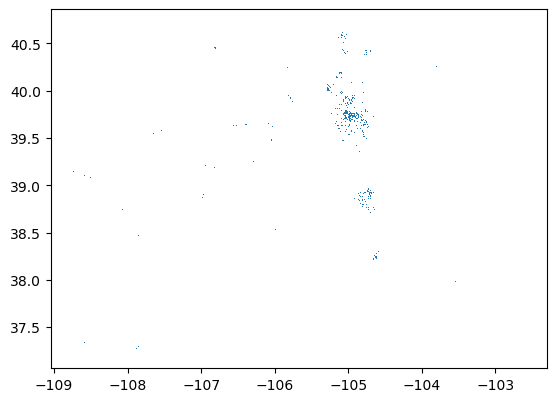

In [5]:
firebreakRoot = r'D:\Projects\Github\SAGIS-Users\anderso\FirebreakEnhancement\data\Internal' 
firebreakPath = r'{0}\{1}'.format(firebreakRoot,'Firebreak_2022_11_CO_Internal.shp')

fbState = gpd.read_file(firebreakPath)

#ag  = fbState[fbState['RISK_VALUE']==1]
#hdr = fbState[fbState['RISK_VALUE']==2]
#mdr = fbState[fbState['RISK_VALUE']==3]
#ldr = fbState[fbState['RISK_VALUE']==4]
#sr  = fbState[fbState['RISK_VALUE']==5]
urb   = fbState[fbState['RISK_VALUE']==6]
#unr = fbState[fbState['RISK_VALUE']==7]
#h2o = fbState[fbState['RISK_VALUE']==8]
#wl  = fbState[fbState['RISK_VALUE']==9]

urb.plot()


In [6]:
urb.geom_type.head()

1522981    Polygon
1523188    Polygon
1523189    Polygon
1523200    Polygon
1523221    Polygon
dtype: object

In [7]:
urb.head()

,STATE,BREAK_NAME,RISK_VALUE,FLAG,geometry
1522981,Colorado,Urban,6,None,"POLYGON ((-105.03115 39.66841, -105.03581 39.6..."
1523188,Colorado,Urban,6,None,"POLYGON ((-105.02650 39.87714, -105.03115 39.8..."
1523189,Colorado,Urban,6,None,"POLYGON ((-105.10102 40.38883, -105.10568 40.3..."
1523200,Colorado,Urban,6,None,"POLYGON ((-104.85415 38.82888, -104.85881 38.8..."
1523221,Colorado,Urban,6,None,"POLYGON ((-104.84483 39.66841, -104.84949 39.6..."


In [8]:
urbBoundary = urb[['BREAK_NAME','geometry']]

dissolveUrb = urbBoundary.dissolve(by='BREAK_NAME')

dissolveUrb.head()

,geometry
BREAK_NAME,
Urban,"MULTIPOLYGON (((-104.62591 38.23523, -104.6305..."


In [10]:
urbBoundary.to_file(firebreakRoot + r"\Urban.shp")

C:\Users\andolson\anaconda3\envs\mlai\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


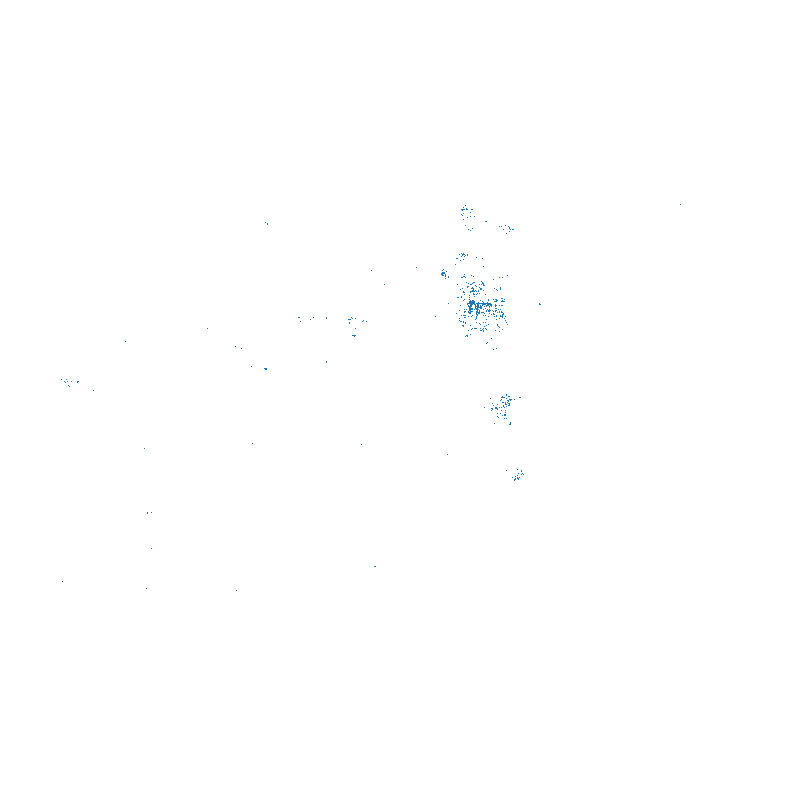

In [11]:
# create the plot
fig, ax = plt.subplots(figsize = (10,10))

dissolveUrb.reset_index().plot(column='BREAK_NAME', ax=ax)

ax.set_axis_off()
plt.axis('equal');

In [13]:
firebreakRoot = r'D:\Projects\Github\SAGIS-Users\anderso\FirebreakEnhancement\data\Internal' 
firebreakPath = r'{0}\{1}'.format(firebreakRoot,'CO_Agriculture.shp')

fbState = gpd.read_file(firebreakPath)

In [14]:
fbState.head()

,BREAK_NAME,geometry
0,Agriculture,"POLYGON ((-107.61169 39.61359, -107.61634 39.6..."
1,Agriculture,"POLYGON ((-102.53447 40.68138, -102.53912 40.6..."
2,Agriculture,"POLYGON ((-103.16330 40.78166, -103.16795 40.7..."
3,Agriculture,"POLYGON ((-107.53716 40.65541, -107.54182 40.6..."
4,Agriculture,"POLYGON ((-103.66636 39.77819, -103.67102 39.7..."


In [15]:
# find the bounds of your geodataframe
x_min, y_min, x_max, y_max = fbState.total_bounds

In [16]:
# set sample size
n = 70
# generate random data within the bounds
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

In [17]:
# convert them to a points GeoSeries
gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
# only keep those points within polygons
gdf_points = gdf_points[gdf_points.within(fbState.unary_union)]

C:\Users\andolson\anaconda3\envs\mlai\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


KeyboardInterrupt: 

In [ ]:
gdf_points.plot()

In [12]:
gdf_points.count()

27

In [13]:
gdf_points.to_file(firebreakRoot + "\AG_pnts.shp")

C:\Users\andolson\anaconda3\envs\mlai\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
